<a href="https://colab.research.google.com/github/arkwith7/aSSIST_ML/blob/main/machine_learning_1_bayes_regres_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matplotlib 버전 업그레이드, 한글 Font 설치

In [ ]:
# Step 1, Matplotlibs 업그레이드
!pip install matplotlib -U
!pip install seaborn -U
!pip install pandas -U

# Step 2, 한글 설치 및 사용 설정
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Step 3, 셀 실행 후 런타임 재시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fon

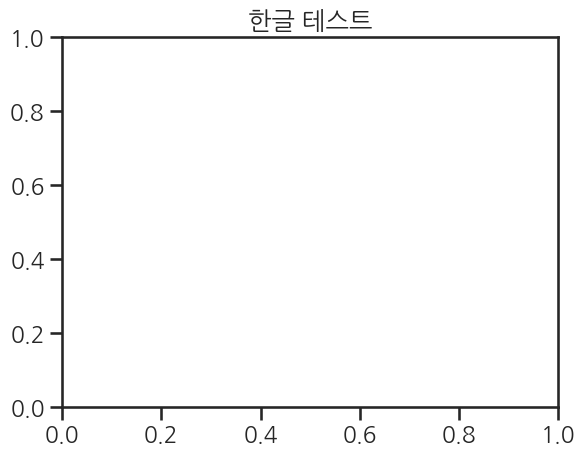

In [ ]:
# Step 4, seaborn 환경설정
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('colorblind')
sns.set_context('talk')

# Step 5, 한글 글꼴 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 한글 설정 확인
%matplotlib inline
plt.title('한글 테스트')
plt.show()

In [ ]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
# import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

# matplotlib 설정
# mpl.use('Agg')

# seaborn 설정
# sns.set()
# sns.set_style("whitegrid")
# sns.set_color_codes()

# 나이브베이즈 모형

사이킷런의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브베이즈 모형 클래스를 제공한다.

- GaussianNB: 정규분포 나이브베이즈
- BernoulliNB: 베르누이분포 나이브베이즈
- MultinomialNB: 다항분포 나이브베이즈

이 클래스들은 다양한 속성값 및 메서드를 가진다. 우선 사전 확률과 관련된 속성은 다음과 같다.

classes_: 종속변수 Y의 클래스(라벨)  
class_count_: 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수  
class_prior_: 종속변수 Y의 무조건부 확률분포 𝑃(𝑌)(정규분포의 경우에만)  
class_log_prior_: 종속변수 Y의 무조건부 확률분포의 로그 log𝑃(𝑌) (베르누이분포나 다항분포의 경우에만)  

https://scikit-learn.org/stable/modules/naive_bayes.html

데이터는 𝑦=0 인 데이터가 40개, 𝑦=1 인 데이터가 60개 주어졌다. 이 데이터를 시각화하면 다음과 같다.

### 참고
다변량 정규분포 (sp.stats.multivariate_normal)

https://namyoungkim.github.io/probability/statistics/2017/09/11/probability_2/


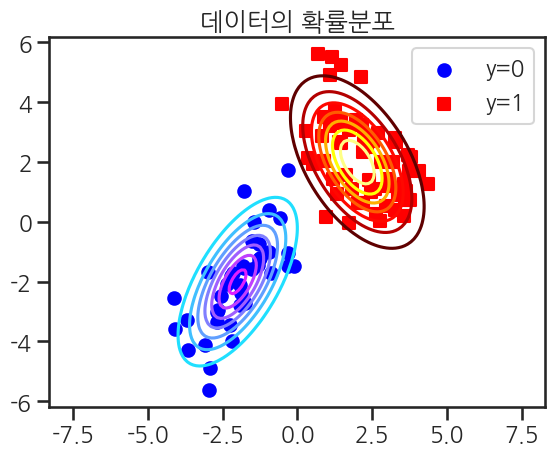

In [ ]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

naive bayes 로 풀기  
𝑝(𝑦=0),𝑝(𝑦=1)  

$p(y|x_1, x_2) \propto p(x_1, x_2|y) p(y)$

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [ ]:
# 클래스 종류
model_norm.classes_

array([0., 1.])

In [ ]:
# 클래스별 데이터개수
model_norm.class_count_


array([40., 60.])

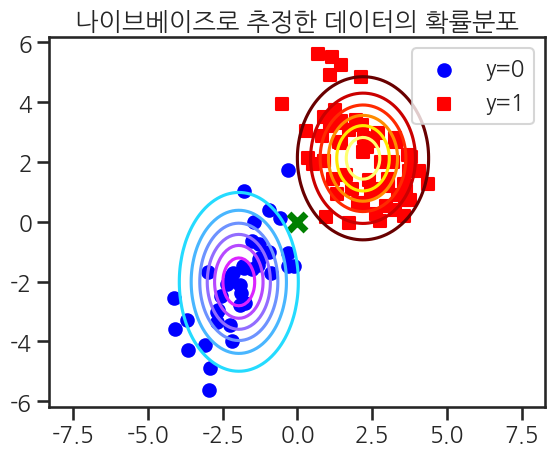

In [ ]:
# 확률분포의의 시각화

rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.var_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.var_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c="g", marker="x", s=150, linewidth=5)
plt.legend()
plt.title("나이브베이즈로 추정한 데이터의 확률분포")
plt.axis("equal")
plt.show()

In [ ]:
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

In [ ]:
likelihood = [
    (sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.var_[0][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.var_[0][1])).pdf(x_new[1])),
    (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.var_[1][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.var_[1][1])).pdf(x_new[1])),
]
likelihood

[0.006615760017637307, 0.004687965595148289]

$p(y|x_1, x_2) \propto p(x_1, x_2|y) p(y)$

In [ ]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.0026463 , 0.00281278])

In [ ]:
posterior / posterior.sum()

array([0.48475244, 0.51524756])

# 샘플문제

붓꽃 분류문제를 가우시안 나이브베이즈 모형을 사용하여 풀어보자.

(1) 각각의 종이 선택될 사전확률을 구하라.

(2) 각각의 종에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭의 평균과 분산을 구하라.

(3) 학습용 데이터를 사용하여 분류문제를 풀고 다음을 계산하라.

분류결과표
분류보고서

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data
y1 = iris.target

from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB().fit(X1, y1)
model1.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [ ]:
y1_pred = model1.predict(X1)

from sklearn.metrics import confusion_matrix

confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## 샘플문제

1) MNIST 숫자 분류문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다. 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다(다음 코드 참조)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X2 = digits.data
y2 = digits.target
from sklearn.preprocessing import Binarizer
X2 = Binarizer().fit_transform(X2)


이 이미지에 대해 베르누이 나이브베이즈 모형을 적용하자. 분류 결과를 분류보고서 형식으로 나타내라.

(2) BernoulliNB 클래스의 binarize 인수를 사용하여 같은 문제를 풀어본다.

(3) 계산된 모형의 모수 벡터 값을 각 클래스별로 8x8 이미지의 형태로 나타내라. 이 이미지는 무엇을 뜻하는가?

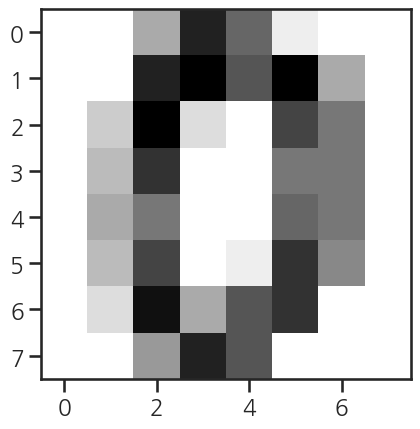

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X2 = digits.data
y2 = digits.target


plt.imshow(X2[0, :].reshape((8, 8)), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

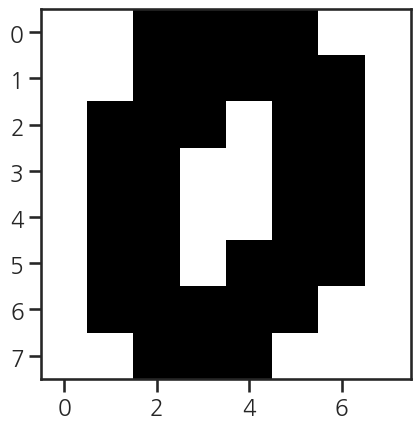

In [ ]:
from sklearn.preprocessing import Binarizer

X2 = Binarizer().fit_transform(X2)

plt.imshow(X2[0, :].reshape((8, 8)), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.76      0.62      0.68       182
           2       0.86      0.86      0.86       177
           3       0.91      0.86      0.88       183
           4       0.91      0.95      0.93       181
           5       0.93      0.82      0.87       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.70      0.82      0.75       174
           9       0.76      0.81      0.78       180

    accuracy                           0.86      1797
   macro avg       0.87      0.86      0.86      1797
weighted avg       0.87      0.86      0.86      1797



## 연습문제

MNIST 숫자 분류문제를 다항분포 나이브베이즈 모형을 사용하여 풀고 이진화(Binarizing)를 하여 베르누이 나이브베이즈 모형을 적용했을 경우와 성능을 비교하라.

In [ ]:
# 연습문제
from sklearn.datasets import load_digits

digits = load_digits()
X2 = digits.data
y2 = digits.target

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



In [ ]:
# 데이터 종류 
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# 학습데이터
# 한 row 가 하나의 숫자 
# 8x8 크기의 이미지가 일열로 늘어져있음
# 하나의 row 의 길이 (64, 1)
X2 = digits.data
print(X2)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
# 레이블데이터 
y2 = digits.target
print(y2)

[0 1 2 ... 8 9 8]


In [ ]:
# 0번 데이터
# 값은 진하기에 따라서 0 ~ 15
X2[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# 0번 데이터를 원래대로 8*8로 복원
X2[0, :].reshape((8, 8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

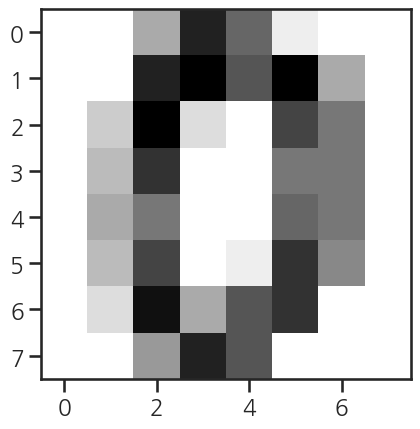

In [ ]:
plt.imshow(X2[0, :].reshape((8, 8)), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
# 0번 데이터의 레이블
y2[0]

0

MultinomialNB 설명  
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


$\log Pr(C_k|W) \propto \log p(C_k) + \Sigma_{i=1}^{n} w_i * \log p(w_i|C_k)$

In [ ]:
# 훈련
model = MultinomialNB().fit(X2, y2)

In [ ]:
# 모델에서 학습한 것들
model.__dict__

{'alpha': 1.0,
 'fit_prior': True,
 'class_prior': None,
 'force_alpha': 'warn',
 'n_features_in_': 64,
 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'class_count_': array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 'feature_count_': array([[0.000e+00, 4.000e+00, 7.450e+02, 2.331e+03, 2.011e+03, 5.210e+02,
         6.000e+00, 0.000e+00, 0.000e+00, 1.580e+02, 2.239e+03, 2.380e+03,
         2.046e+03, 2.025e+03, 1.720e+02, 0.000e+00, 0.000e+00, 6.640e+02,
         2.541e+03, 9.370e+02, 3.740e+02, 2.166e+03, 6.270e+02, 0.000e+00,
         0.000e+00, 9.420e+02, 2.263e+03, 3.550e+02, 2.500e+01, 1.613e+03,
         1.148e+03, 0.000e+00, 0.000e+00, 1.045e+03, 2.057e+03, 1.590e+02,
         8.000e+00, 1.562e+03, 1.268e+03, 0.000e+00, 0.000e+00, 6.220e+02,
         2.365e+03, 2.940e+02, 2.730e+02, 2.013e+03, 1.042e+03, 0.000e+00,
         0.000e+00, 1.420e+02, 2.324e+03, 1.773e+03, 1.842e+03, 2.359e+03,
         4.300e+02, 0.000e+00, 0.000e+00, 1.000e+00, 7.400e+02, 2

In [ ]:
len(model.feature_count_)

10

In [ ]:
len(model.feature_count_[0])

64

In [ ]:
y2_pred = model.predict(X2)

from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



In [ ]:
# 이진화 하여 베르누이 나이브베이즈 모형을 적용

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer
X = Binarizer().fit_transform(X)

model = BernoulliNB().fit(X, y)
y_pred = model.predict(X)

from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.76      0.62      0.68       182
           2       0.86      0.86      0.86       177
           3       0.91      0.86      0.88       183
           4       0.91      0.95      0.93       181
           5       0.93      0.82      0.87       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.70      0.82      0.75       174
           9       0.76      0.81      0.78       180

    accuracy                           0.86      1797
   macro avg       0.87      0.86      0.86      1797
weighted avg       0.87      0.86      0.86      1797



# 선형회귀

우선 make_regression 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.


In [ ]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [ ]:
w

array(86.44794301)

bias = 100
w = 86.44794301 이므로  
$y = 100 + 86.44794301 x + \epsilon$

In [ ]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

최소자승법으로 구한 선형회귀모형은 다음과 같다.
$\hat{y} = 99.79150869 + 86.96171201 x$

비슷하지만 똑같지는는 않음
값을을 대입해서 y 를 구해보면

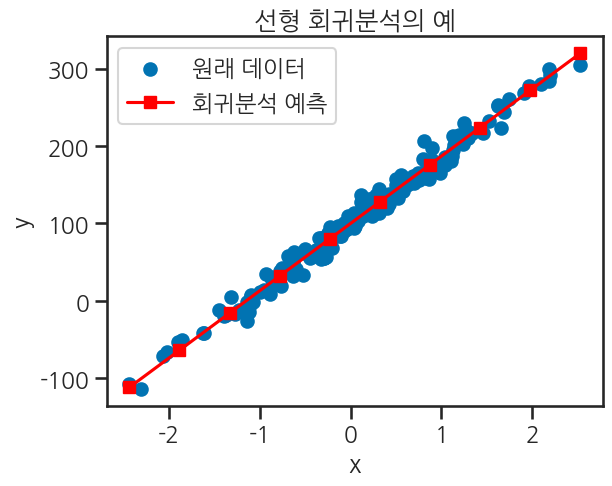

In [ ]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

# scikit-learn 패키지를 사용한 선형 회귀분석

In [ ]:
# coef_ : 추정된 가중치 벡터
# intercept_ : 추정된 상수항

# predict 로 새로운 데이터에 대한한 출력 예측
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


predict 할때는는 배열로 입력해야 됨

In [ ]:
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# statsmodels 패키지를 사용한 선형 회귀분석

In [ ]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [ ]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          8.17e-182
Time:                        09:25:45   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

In [ ]:
result.predict(np.array([[1,-2], [1,-1], [1,0], [1,1], [1,2]]))

array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

# 로지스틱 회귀 


## 샘플 문제

붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다.  

위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.  

이 모형에 대해 ROC커브를 그리고 AUC를 구한다.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[["sepal length (cm)", "species"]]
df = df[df.species.isin([0, 1])]
df = df.rename(columns={"sepal length (cm)": "sepal_length" })

import statsmodels.api as sm

model = sm.Logit.from_formula("species ~ sepal_length", data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Apr 2023   Pseudo R-squ.:                  0.5368
Time:                        09:25:47   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[["sepal length (cm)", "species"]]
df = df[df.species.isin([0, 1])]
df = df.rename(columns={"sepal length (cm)": "sepal_length" })
X = df.sepal_length.array.reshape(-1, 1)
y = df.species
model_sk = LogisticRegression().fit(X, y)

In [ ]:
y_pred = model_sk.predict(X)


In [ ]:
confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



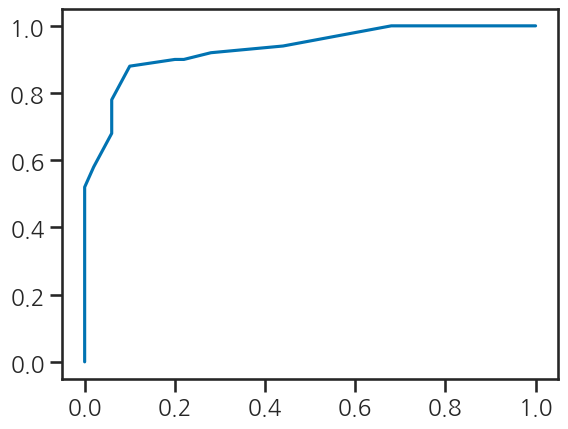

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df.species, result.predict(df.sepal_length))
plt.plot(fpr, tpr)
plt.show()

## 연습 문제

붓꽃 분류문제에서 클래스가 베르시칼라(versicolor)와 버지니카(virginica) 데이터만 사용하여(versicolor=1, virginica=2) 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 

In [ ]:
# 연습문제 준비

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[df.species.isin([1, 2])]
df["species"] -= 1
df = df.rename(
    columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width",
    }
)

In [ ]:
# 연습문제 코드 작성
# 
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [ ]:
X = df[['petal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [ ]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X, y)

In [ ]:
model_sk.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'feature_names_in_': array(['petal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 'classes_': array([0, 1]),
 'n_iter_': array([31], dtype=int32),
 'coef_': array([[ 1.82838727, -0.64613654,  1.82838727,  2.11260875]]),
 'intercept_': array([-19.51678125])}

In [ ]:
y_pred = model_sk.predict(X)
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      0.96      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



# 소프트맥스 회귀


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

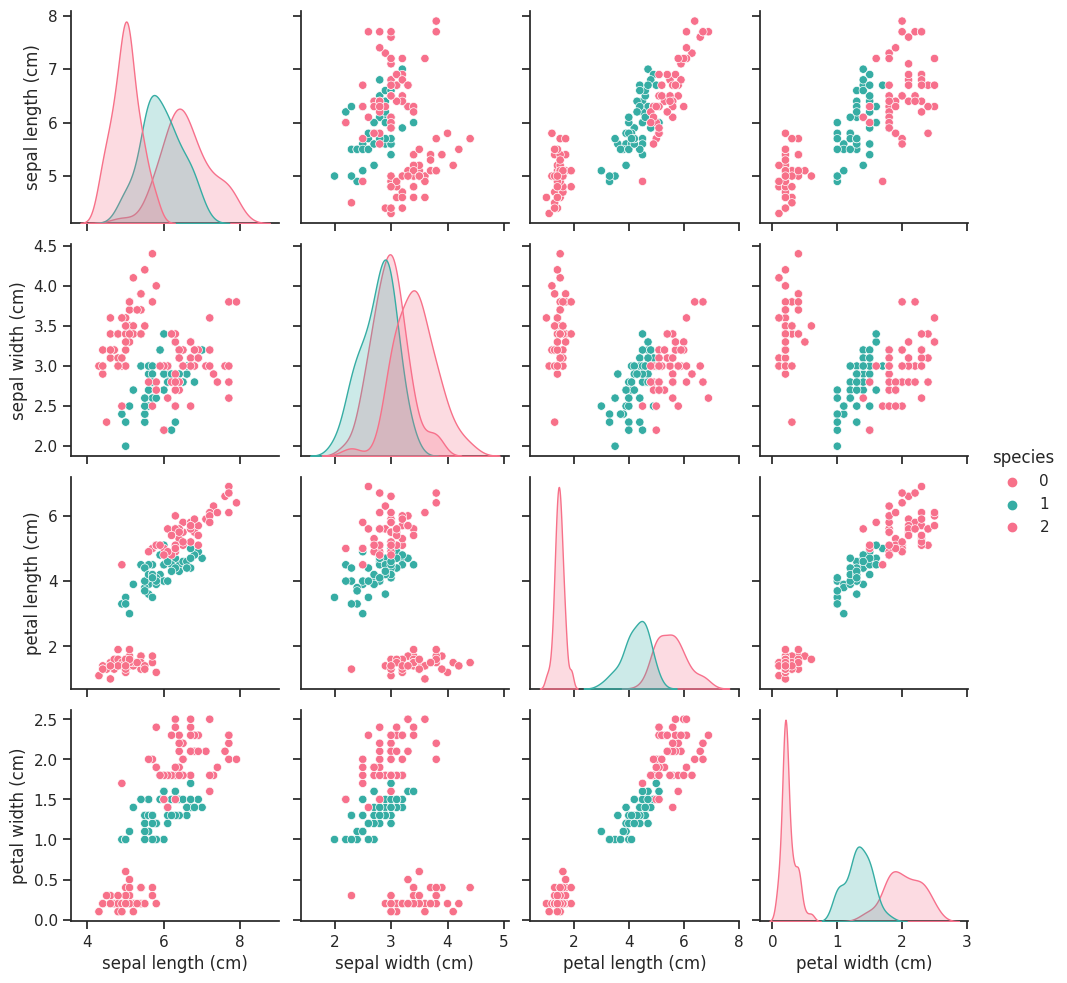

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="species", palette="husl")

<Axes: xlabel='species'>

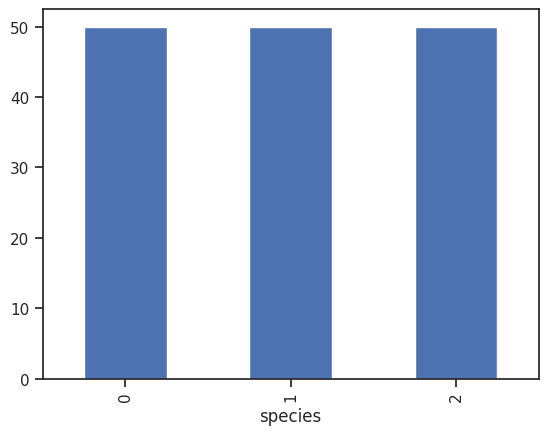

In [ ]:
# 150개의 샘플 데이터 중에서 Species열에서 각 품종이 몇 개있는지 확인
df['species'].value_counts().plot(kind='bar')

In [ ]:
model_sk = LogisticRegression().fit(X, y)
y_pred = model_sk.predict(X)
confusion_matrix(y, y_pred)
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.8, random_state=1)


In [ ]:
# 학습 데이터로로 훈련련 후 테스트 데이터로 성능 확인

model_sk = LogisticRegression().fit(X_train, y_train)
y_pred = model_sk.predict(X_test)
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## 연습문제

MNIST 숫자 분류문제를 train set, test set 을 7:3 으로 나누고 다항분포 나이브베이즈 모형을 사용하여 풀고 이진화(Binarizing)를 하여 베르누이 나이브베이즈 모형을 적용했을 경우와 성능을 비교하라.

In [ ]:
# 연습문제 코드 작성
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

digits = load_digits()
X = digits.data
y = digits.target

(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1)


model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.89      0.65      0.75        49
           2       0.80      0.84      0.82        49
           3       1.00      0.81      0.90        64
           4       0.97      0.97      0.97        61
           5       0.94      0.96      0.95        47
           6       0.98      1.00      0.99        51
           7       0.89      0.98      0.93        57
           8       0.76      0.91      0.83        46
           9       0.81      0.91      0.86        57

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.90       540
weighted avg       0.91      0.90      0.90       540



In [ ]:
# 연습문제 코드 작성
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

digits = load_digits()
X = digits.data
y = digits.target

(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1)


model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.89      0.65      0.75        49
           2       0.80      0.84      0.82        49
           3       1.00      0.81      0.90        64
           4       0.97      0.97      0.97        61
           5       0.94      0.96      0.95        47
           6       0.98      1.00      0.99        51
           7       0.89      0.98      0.93        57
           8       0.76      0.91      0.83        46
           9       0.81      0.91      0.86        57

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.90       540
weighted avg       0.91      0.90      0.90       540



In [ ]:
from sklearn.preprocessing import Binarizer
X_train2 = Binarizer().fit_transform(X_train)
X_test2 = Binarizer().fit_transform(X_test)

model = BernoulliNB().fit(X_train2, y_train)
y2_pred = model.predict(X_test2)
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.65      0.53      0.58        49
           2       0.76      0.84      0.80        49
           3       0.93      0.81      0.87        64
           4       0.95      0.97      0.96        61
           5       0.93      0.91      0.92        47
           6       1.00      0.96      0.98        51
           7       0.89      0.98      0.93        57
           8       0.68      0.83      0.75        46
           9       0.80      0.82      0.81        57

    accuracy                           0.86       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.87      0.86      0.86       540

